In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd


In [2]:
#loading files via numpy
from numpy import loadtxt

def load_precalc_params_small():

    file = open('../input/content-based-filtering-andrewng-dataset/small_movies_X.csv', 'rb')
    X = loadtxt(file, delimiter = ",")

    file = open('../input/content-based-filtering-andrewng-dataset/small_movies_W.csv', 'rb')
    W = loadtxt(file,delimiter = ",")

    file = open('../input/content-based-filtering-andrewng-dataset/small_movies_b.csv', 'rb')
    b = loadtxt(file,delimiter = ",")
    b = b.reshape(1,-1)
    num_movies, num_features = X.shape
    num_users,_ = W.shape
    return (X, W, b, num_movies, num_features, num_users)

def load_ratings_small():
    file = open('../input/content-based-filtering-andrewng-dataset/small_movies_Y.csv', 'rb')
    Y = loadtxt(file,delimiter = ",")

    file = open('../input/content-based-filtering-andrewng-dataset/small_movies_R.csv', 'rb')
    R = loadtxt(file,delimiter = ",")
    return(Y,R)

In [3]:
X, W, b, num_movies, num_features, num_users =load_precalc_params_small()
Y, R = load_ratings_small()

In [4]:
print('X',X.shape)
print('W',W.shape)
print('b',b.shape)
print('Y',Y.shape)
print('R',R.shape)

X (4778, 10)
W (443, 10)
b (1, 443)
Y (4778, 443)
R (4778, 443)


In [5]:
#Avg rating
#For single user
avg_rating=np.mean(Y[0,R[0].astype(bool)])
#or
#avg_taring=np.mean(Y[0,R[0]==1])

print(f"Avg rating of 1st movie = {avg_rating:0.3f} / 5")


Avg rating of 1st movie = 3.400 / 5


## Collaborative filtering cost function

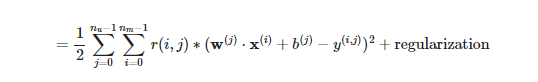

In [6]:
def cofi_cost_func(X, W, b, Y, R, lambda_):
    # 2 syntax, both works
    # 1:
    #J=(np.dot(X,W.T)+b - Y)*R
    #J=(1/2)* np.sum(J**2) + lambda_/2 * np.sum(W**2) +lambda_/2 * np.sum(X**2)
    
    #or
    # 2:
    J = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R      #matmul works different for dimensions>2
    J = 0.5 * tf.reduce_sum(J**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    
    return J

In [7]:
#Testing if cost function is giving correct values, answer for below values should be 13.67 and 28.09

# Reduce the data set size so that this runs faster
num_users_r = 4
num_movies_r = 5 
num_features_r = 3

X_r = X[:num_movies_r, :num_features_r]
W_r = W[:num_users_r,  :num_features_r]
b_r = b[0, :num_users_r].reshape(1,-1)
Y_r = Y[:num_movies_r, :num_users_r]
R_r = R[:num_movies_r, :num_users_r]

# Evaluate cost function
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 0);
print(f"Cost: {J:0.2f}")

# Evaluate cost function with regularization 
J = cofi_cost_func(X_r, W_r, b_r, Y_r, R_r, 1.5);
print(f"Cost (with regularization): {J:0.2f}")


Cost: 13.67
Cost (with regularization): 28.09


2022-09-05 10:33:48.061401: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
movieList_df=pd.read_csv('../input/content-based-filtering-andrewng-dataset/small_movie_list.csv',index_col=0)

In [9]:
movieList=movieList_df['title'].to_list()

In [10]:
my_ratings = np.zeros(num_movies)          #  Initialize my ratings

# Check the file small_movie_list.csv for id of each movie in our dataset
# For example, Toy Story 3 (2010) has ID 2700, so to rate it "5", you can set
my_ratings[2700] = 5 

#Or suppose you did not enjoy Persuasion (2007), you can set
my_ratings[2609] = 2;

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[929]  = 5   # Lord of the Rings: The Return of the King, The
my_ratings[246]  = 5   # Shrek (2001)
my_ratings[2716] = 3   # Inception
my_ratings[1150] = 5   # Incredibles, The (2004)
my_ratings[382]  = 2   # Amelie (Fabuleux destin d'Amélie Poulain, Le)
my_ratings[366]  = 5   # Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
my_ratings[622]  = 5   # Harry Potter and the Chamber of Secrets (2002)
my_ratings[988]  = 3   # Eternal Sunshine of the Spotless Mind (2004)
my_ratings[2925] = 1   # Louis Theroux: Law & Disorder (2008)
my_ratings[2937] = 1   # Nothing to Declare (Rien à déclarer)
my_ratings[793]  = 5   # Pirates of the Caribbean: The Curse of the Black Pearl (2003)
my_rated = [i for i in range(len(my_ratings)) if my_ratings[i] > 0]

print('\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0 :
        print(f'Rated {my_ratings[i]} for  {movieList_df.loc[i,"title"]}');


New user ratings:

Rated 5.0 for  Shrek (2001)
Rated 5.0 for  Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Rated 2.0 for  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Rated 5.0 for  Harry Potter and the Chamber of Secrets (2002)
Rated 5.0 for  Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Rated 5.0 for  Lord of the Rings: The Return of the King, The (2003)
Rated 3.0 for  Eternal Sunshine of the Spotless Mind (2004)
Rated 5.0 for  Incredibles, The (2004)
Rated 2.0 for  Persuasion (2007)
Rated 5.0 for  Toy Story 3 (2010)
Rated 3.0 for  Inception (2010)
Rated 1.0 for  Louis Theroux: Law & Disorder (2008)
Rated 1.0 for  Nothing to Declare (Rien à déclarer) (2010)


In [11]:
Y.shape,my_ratings.shape

((4778, 443), (4778,))

In [12]:
Y,R=load_ratings_small()
Y=np.c_[my_ratings,Y]
R=np.c_[(my_ratings!=0).astype(int),R]

In [13]:
#Normalize 
Y_mean=(np.sum(Y*R,axis=1)/(np.sum(R,axis=1)+1e-12)).reshape(-1,1)
Y_norm=Y-Y_mean*R

In [14]:
num_movies,num_users=Y.shape
num_features=100

tf.random.set_seed(1234)
W=tf.Variable(tf.random.normal((num_users,num_features),dtype=tf.float64),name='W')
X=tf.Variable(tf.random.normal((num_movies,num_features),dtype=tf.float64),name='X')
b=tf.Variable(tf.random.normal((1,num_users),dtype=tf.float64),name='b')

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1)

In [15]:
#  Using tensorflow , we can find derivative of cost function
# here X,W,b are parameters, means we apply gradient descent on them
# W=W-alpha*d_J(W,X,b)/dW
# X=X-alpha*d_J(W,X,b)/dX
# b=b-alpha*d_J(W,X,b)/db
#these derivatives can be computed by 'tape' as below


iterations=200
lambda_=1
for i in range(iterations):
    # Use TensorFlow’s GradientTape
    # to record the operations used to compute the cost 

    with tf.GradientTape() as tape:
        # Compute the cost (forward pass included in cost)
        cost=cofi_cost_func(X,W,b,Y_norm,R,lambda_)
        
    # Use the gradient tape to automatically retrieve
    # the gradients of the trainable variables with respect to the loss
    grad=tape.gradient(cost,[X,W,b])
    
    # Run one step of gradient descent by updating
    # the value of the variables to minimize the loss.
    optimizer.apply_gradients(zip(grad,[X,W,b]))
    
    # Log periodically.
    if i % 20 == 0:
        print(f"Training loss at iteration {i}: {cost:0.1f}")

Training loss at iteration 0: 2321191.3
Training loss at iteration 20: 136168.7
Training loss at iteration 40: 51863.3
Training loss at iteration 60: 24598.8
Training loss at iteration 80: 13630.4
Training loss at iteration 100: 8487.6
Training loss at iteration 120: 5807.7
Training loss at iteration 140: 4311.6
Training loss at iteration 160: 3435.2
Training loss at iteration 180: 2902.1


## Predicted ratings

In [16]:
p=np.matmul(X.numpy(),tf.transpose(W.numpy())) + b.numpy()

In [17]:
pm=p+Y_mean

## pm has predicted ratings for all users for all movies

In [18]:
#Giving predictions to 1 user i.e you, you also included your ratings above , so recommendations for you :
my_predictions=pm[:,0]

sorted_index=tf.argsort(my_predictions,direction='DESCENDING')
for i in range(20):
    j=sorted_index[i]
    if j not in my_rated:
        print(f'Predicting rating {my_predictions[j]:0.2f} for movie {movieList[j]}')


Predicting rating 4.49 for movie My Sassy Girl (Yeopgijeogin geunyeo) (2001)
Predicting rating 4.48 for movie Martin Lawrence Live: Runteldat (2002)
Predicting rating 4.48 for movie Memento (2000)
Predicting rating 4.47 for movie Delirium (2014)
Predicting rating 4.47 for movie Laggies (2014)
Predicting rating 4.47 for movie One I Love, The (2014)
Predicting rating 4.46 for movie Particle Fever (2013)
Predicting rating 4.45 for movie Eichmann (2007)
Predicting rating 4.45 for movie Battle Royale 2: Requiem (Batoru rowaiaru II: Chinkonka) (2003)
Predicting rating 4.45 for movie Into the Abyss (2011)
Predicting rating 4.45 for movie Son of the Bride (Hijo de la novia, El) (2001)
Predicting rating 4.44 for movie Rivers and Tides (2001)
Predicting rating 4.44 for movie George Carlin: It's Bad for Ya! (2008)


In [19]:
print('\n\nOriginal vs Predicted ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {movieList[i]}')



Original vs Predicted ratings:

Original 5.0, Predicted 4.90 for Shrek (2001)
Original 5.0, Predicted 4.84 for Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)
Original 2.0, Predicted 2.13 for Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)
Original 5.0, Predicted 4.88 for Harry Potter and the Chamber of Secrets (2002)
Original 5.0, Predicted 4.87 for Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Original 5.0, Predicted 4.89 for Lord of the Rings: The Return of the King, The (2003)
Original 3.0, Predicted 3.00 for Eternal Sunshine of the Spotless Mind (2004)
Original 5.0, Predicted 4.90 for Incredibles, The (2004)
Original 2.0, Predicted 2.11 for Persuasion (2007)
Original 5.0, Predicted 4.80 for Toy Story 3 (2010)
Original 3.0, Predicted 3.00 for Inception (2010)
Original 1.0, Predicted 1.41 for Louis Theroux: Law & Disorder (2008)
Original 1.0, Predicted 1.26 for Nothing to Declare (Rien à déclarer) (2010)


In practice, additional information can be utilized to enhance our predictions. Above, the predicted ratings for the first few hundred movies lie in a small range. We can augment the above by selecting from those top movies, movies that have high average ratings and movies with more than 20 ratings. This section uses a Pandas data frame which has many handy sorting features.

In [20]:
movieList_df['pred']=my_predictions
movieList_df

,mean rating,number of ratings,title,pred
0,3.400000,5,"Yards, The (2000)",2.768113
1,3.250000,6,Next Friday (2000),2.741133
2,2.000000,4,Supernova (2000),1.324607
3,2.000000,4,Down to You (2000),1.604700
4,2.672414,29,Scream 3 (2000),2.298114
...,...,...,...,...
4773,3.500000,1,Jon Stewart Has Left the Building (2015),2.917507
4774,4.000000,1,Black Butler: Book of the Atlantic (2017),3.408843
4775,3.500000,1,No Game No Life: Zero (2017),2.925049
4776,3.500000,1,Flint (2017),2.925112


In [21]:
#Moving pred col before mean rating col
movieList_df=movieList_df.reindex(columns=["pred", "mean rating", "number of ratings", "title"])
movieList_df

,pred,mean rating,number of ratings,title
0,2.768113,3.400000,5,"Yards, The (2000)"
1,2.741133,3.250000,6,Next Friday (2000)
2,1.324607,2.000000,4,Supernova (2000)
3,1.604700,2.000000,4,Down to You (2000)
4,2.298114,2.672414,29,Scream 3 (2000)
...,...,...,...,...
4773,2.917507,3.500000,1,Jon Stewart Has Left the Building (2015)
4774,3.408843,4.000000,1,Black Butler: Book of the Atlantic (2017)
4775,2.925049,3.500000,1,No Game No Life: Zero (2017)
4776,2.925112,3.500000,1,Flint (2017)


In [22]:
#Taking top 300 highest rated movies from your prediction, filtering with 'number of ratings'>20 and then sorting by 'mean rating'
movieList_df.loc[sorted_index[:300]].loc[(movieList_df['number of ratings']>20)].sort_values('mean rating',ascending=False)

,pred,mean rating,number of ratings,title
1743,4.030965,4.252336,107,"Departed, The (2006)"
2112,3.985287,4.238255,149,"Dark Knight, The (2008)"
211,4.477792,4.122642,159,Memento (2000)
929,4.887053,4.118919,185,"Lord of the Rings: The Return of the King, The..."
2700,4.796530,4.109091,55,Toy Story 3 (2010)
653,4.357304,4.021277,188,"Lord of the Rings: The Two Towers, The (2002)"
1122,4.004469,4.006494,77,Shaun of the Dead (2004)
1841,3.980647,4.000000,61,Hot Fuzz (2007)
3083,4.084633,3.993421,76,"Dark Knight Rises, The (2012)"
2804,4.434171,3.989362,47,Harry Potter and the Deathly Hallows: Part 1 (...
